<a href="https://colab.research.google.com/github/Rahul1498/Linear-Regression/blob/main/Linear_Regression_Medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/insurance.csv')

In [4]:
df.head()#top 5 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info() ##information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()## check for the number of missing values

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
df.sex.value_counts()

,count
sex,
male,676
female,662


In [8]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [9]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [10]:
df['bmi']=df['bmi'].round()
df['charges']=df['charges'].round()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('charges',axis=1),df['charges'],test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((1070, 6), (268, 6))

In [12]:
from sklearn.preprocessing import OneHotEncoder
cat_columns=['sex','smoker','region']
ohe=OneHotEncoder(drop='first',sparse_output=False,dtype=int)

X_train_encoded=ohe.fit_transform(X_train[cat_columns])
X_test_encoded=ohe.transform(X_test[cat_columns])

In [13]:
X_train_encoded, X_test_encoded

(array([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        ...,
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 1],
        [1, 0, 0, 0, 1]]),
 array([[0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0],
        ...,
        [1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1]]))

In [14]:
X_train_numerical= X_train.drop(cat_columns,axis=1)
X_test_numerical= X_test.drop(cat_columns,axis=1)


In [15]:
ohe.get_feature_names_out(cat_columns)

array(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [16]:
X_train_encoded=pd.concat([X_train_numerical,pd.DataFrame(X_train_encoded,columns=ohe.get_feature_names_out(cat_columns))],axis=1)
X_test_encoded=pd.concat([X_test_numerical,pd.DataFrame(X_test_encoded,columns=ohe.get_feature_names_out(cat_columns))],axis=1)

In [17]:
df_encoded= ohe.fit_transform(df[cat_columns])

In [18]:
X_train_encoded

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46.0,20.0,2.0,0.0,1.0,1.0,0.0,0.0
1285,47.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN
1142,52.0,25.0,0.0,NaN,NaN,NaN,NaN,NaN
969,39.0,34.0,5.0,0.0,0.0,0.0,0.0,0.0
486,54.0,21.0,3.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
1048,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0
1052,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0
1055,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0


In [19]:
df_encoded= pd.DataFrame(df_encoded,columns=ohe.get_feature_names_out(cat_columns))
df_encoded

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [20]:
df_encoded=pd.concat([df.drop(cat_columns,axis=1),df_encoded.reset_index(drop=True)],axis=1)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,28.0,0,16885.0,0,1,0,0,1
1,18,34.0,1,1726.0,1,0,0,1,0
2,28,33.0,3,4449.0,1,0,0,1,0
3,33,23.0,0,21984.0,1,0,1,0,0
4,32,29.0,0,3867.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10601.0,1,0,1,0,0
1334,18,32.0,0,2206.0,0,0,0,0,0
1335,18,37.0,0,1630.0,0,0,0,1,0
1336,21,26.0,0,2008.0,0,0,0,0,1


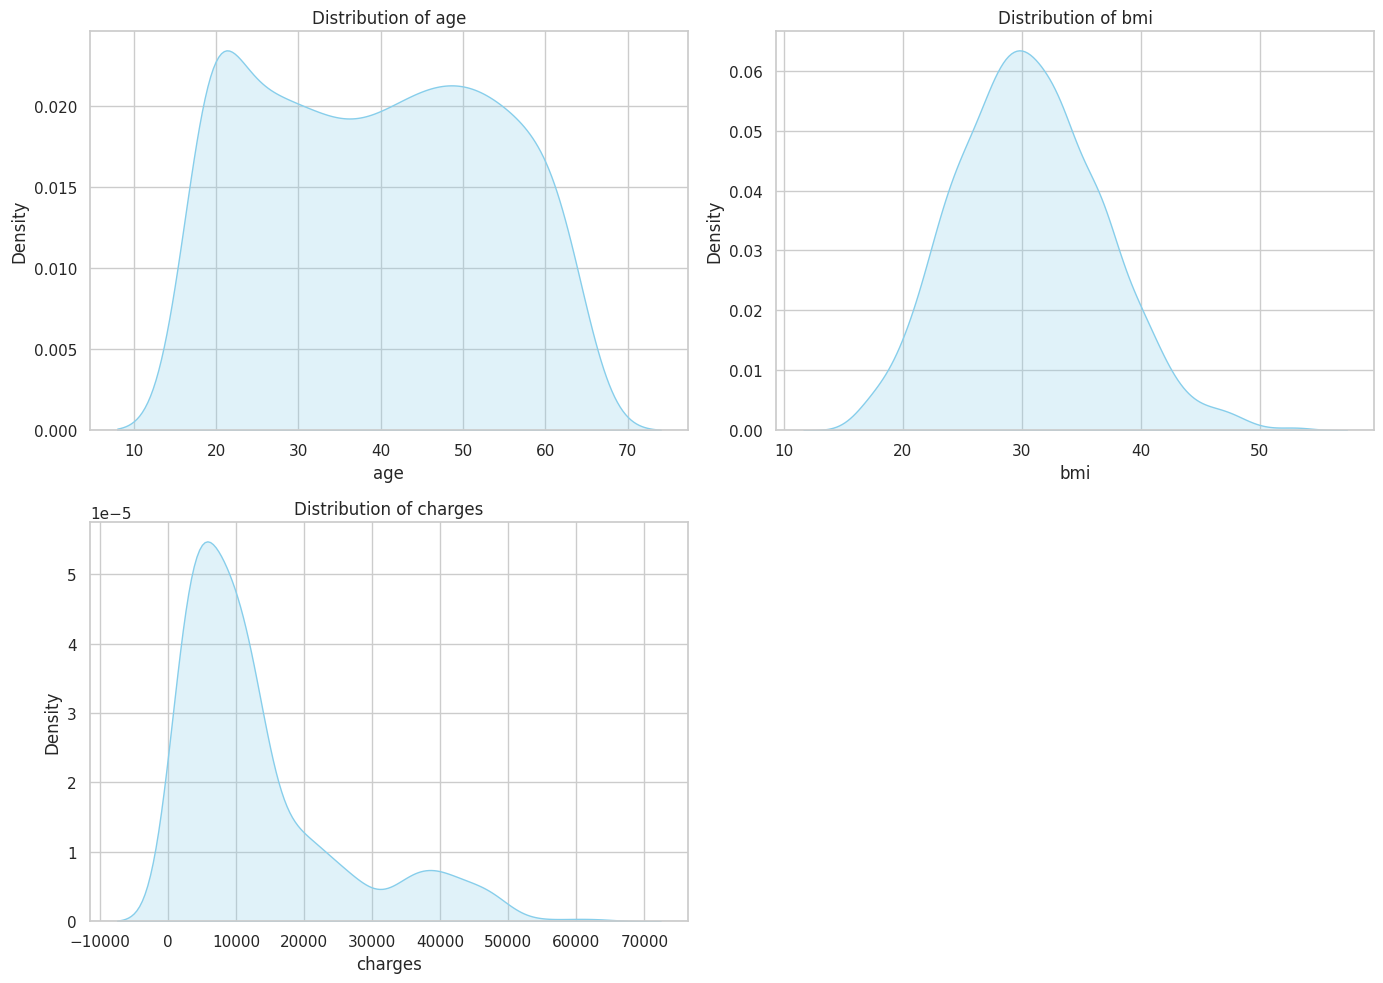

In [21]:
import seaborn as sns
numerical_cols=['age','bmi','charges']
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df_encoded[col],  fill=True, color="skyblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test=train_test_split(df_encoded.drop('charges',axis=1),df['charges'],test_size=0.2,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_encoded)
X_test_scaled=scaler.transform(X_test_encoded)

In [24]:
X_test_scaled

array([[ 0.40114007, -0.92029468,  0.73433626, ...,         nan,
                nan,         nan],
       [-0.23863782, -0.09210687, -0.91119211, ...,         nan,
                nan,         nan],
       [ 1.75178229, -0.58901956, -0.91119211, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [        nan,         nan,         nan, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [        nan,         nan,         nan, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [25]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train_encoded.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test_encoded.columns)

In [26]:
X_train_scaled

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.472227,-1.748482,0.734336,-1.024602,1.965613,1.783168,-0.599661,-0.572314
1,0.543313,-1.085932,-0.911192,NaN,NaN,NaN,NaN,NaN
2,0.898745,-0.920295,-0.911192,NaN,NaN,NaN,NaN,NaN
3,-0.025379,0.570443,3.202629,-1.024602,-0.508747,-0.560800,-0.599661,-0.572314
4,1.040918,-1.582845,1.557100,-1.024602,-0.508747,-0.560800,1.667609,-0.572314
...,...,...,...,...,...,...,...,...
1276,NaN,NaN,NaN,-1.024602,-0.508747,-0.560800,1.667609,-0.572314
1277,NaN,NaN,NaN,-1.024602,1.965613,-0.560800,1.667609,-0.572314
1278,NaN,NaN,NaN,0.975989,-0.508747,-0.560800,-0.599661,1.747292
1279,NaN,NaN,NaN,-1.024602,-0.508747,1.783168,-0.599661,-0.572314


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('charges',axis=1),df['charges'],test_size=0.2,random_state=42)

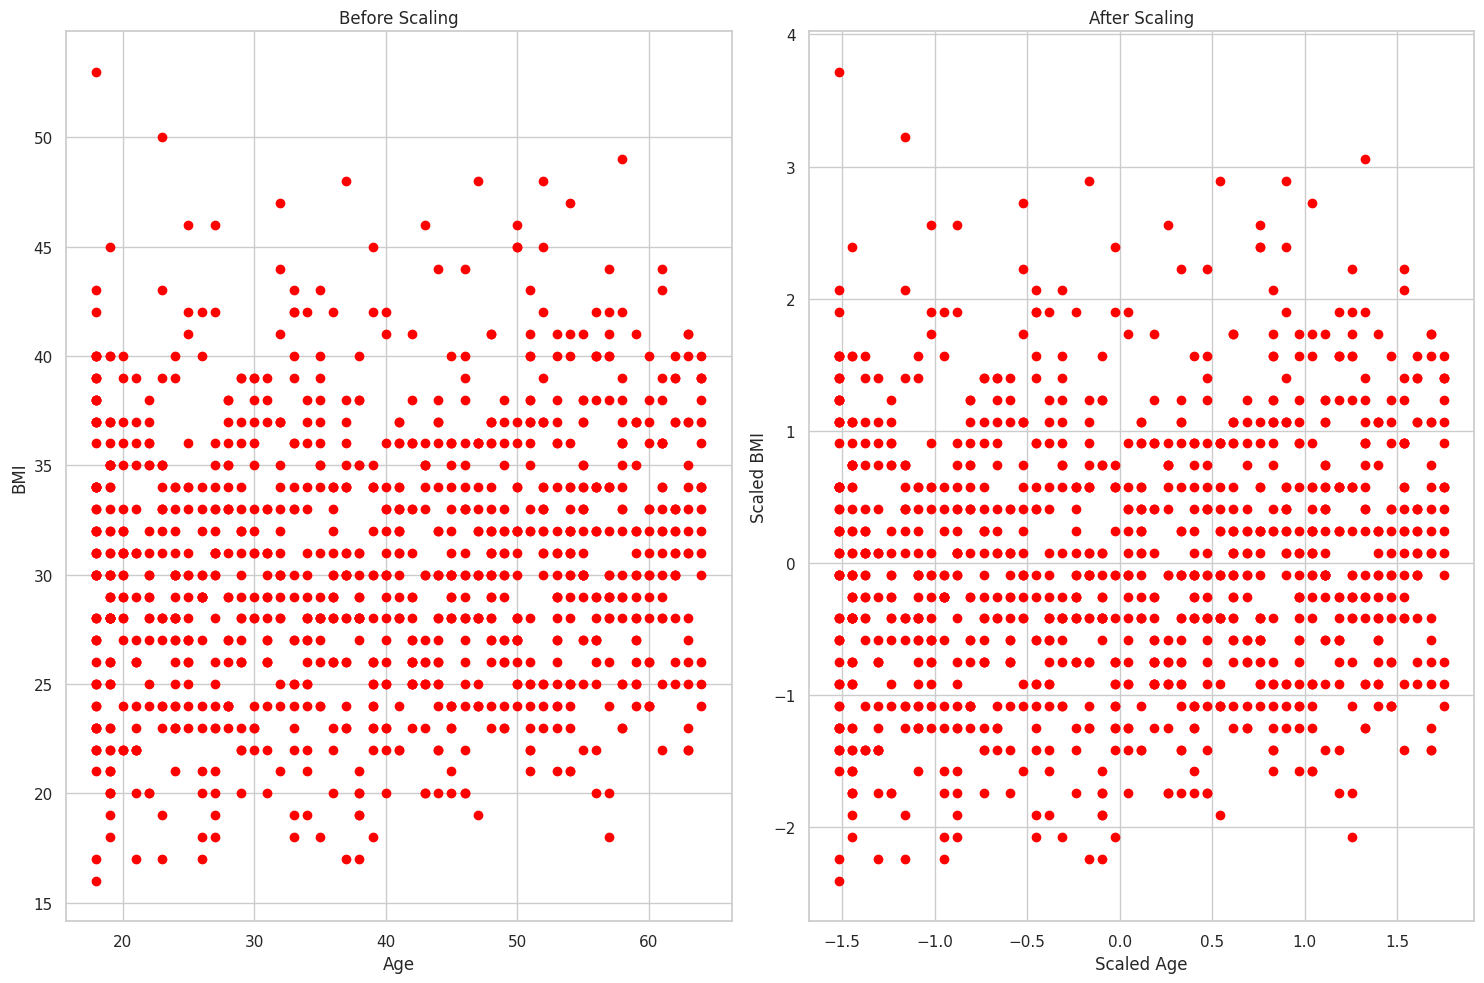

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Scatter plot for 'age' and 'bmi' before scaling
axes[0].scatter(X_train['age'], X_train['bmi'], color='red')
axes[0].set_title("Before Scaling")
axes[0].set_xlabel('Age')
axes[0].set_ylabel('BMI')

# Scatter plot for 'age' and 'bmi' after scaling
axes[ 1].scatter(X_train_scaled['age'], X_train_scaled['bmi'], color='red')
axes[1].set_title("After Scaling")
axes[1].set_xlabel('Scaled Age')
axes[1].set_ylabel('Scaled BMI')


plt.tight_layout()
plt.show()

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, dtype=int)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])


In [30]:
linear_pipeline.fit(X_train, Y_train)

linear_predictions = linear_pipeline.predict(X_test)


In [31]:
linear_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

mse = mean_squared_error(Y_test, linear_predictions)
r2 = r2_score(Y_test, linear_predictions)
mae = mean_absolute_error(Y_test, linear_predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 33644583.78750209
R-squared: 0.7832852226426437
Mean Absolute Error: 4182.174734577755
Root Mean Squared Error: 5800.395140634997


In [33]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

mse = mean_squared_error(Y_train, linear_predictions)
r2 = r2_score(Y_train, linear_predictions)
mae = mean_absolute_error(Y_train, linear_predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

ValueError: Found input variables with inconsistent numbers of samples: [1070, 268]